In [1]:
import os 
os.chdir("/workspaces/p99-bluesky/tests/")

import asyncio
import subprocess, os
from bluesky.run_engine import RunEngine
from ophyd_async.core import init_devices
from ophyd_async.epics.core import epics_signal_r, epics_signal_rw
from ophyd_async.core.signal import observe_value, wait_for_value
from p99_bluesky.devices.p99.sample_stage import (
    FilterMotor,
    SampleAngleStage,
    p99StageSelections,
)
from p99_bluesky.plans.fast_scan import fast_scan_1d, fast_scan_grid
from p99_bluesky.plans.stxm import stxm_fast,get_velocity_and_step_size
from soft_motor import SoftThreeAxisStage
from bluesky.run_engine import RunEngine
from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky.plans import count, scan 
from ophyd.sim import noisy_det, det1,det2,det3
from ophyd.sim import motor
bec = BestEffortCallback()
RE = RunEngine({})
from databroker import Broker
from bluesky.utils import Msg
db = Broker.named('temp')
RE.subscribe(db.insert)

0

In [10]:
def simple_scan_saving(det, motor,det1):
    yield Msg("open_run")
    yield Msg("declare_stream", None, motor, det, det1, name="primary")
    yield Msg("create", name="primary")
    yield Msg("set", motor, 5)
    yield Msg("read", motor)
    yield Msg("trigger", det)
    yield Msg("read", det)
    yield Msg("read", det1)
    yield Msg("save")
    yield Msg("close_run")



Transient Scan ID: 5     Time: 2024-07-04 12:58:11
Persistent Unique Scan ID: 'bba38f0c-0c31-43a0-aeae-fed843e6ea26'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |       det2 |  noisy_det |      motor |
+-----------+------------+------------+------------+------------+


Run aborted
Traceback (most recent call last):
  File "/venv/lib/python3.11/site-packages/bluesky/run_engine.py", line 1522, in _run
    msg = self._plan_stack[-1].throw(stashed_exception or resp)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_1071954/2290841470.py", line 10, in simple_scan_saving
    yield Msg("read", det1)
  File "/venv/lib/python3.11/site-packages/bluesky/run_engine.py", line 1607, in _run
    new_response = await coro(msg)
                   ^^^^^^^^^^^^^^^
  File "/venv/lib/python3.11/site-packages/bluesky/run_engine.py", line 1902, in _read
    await current_run.read(msg, ret)
  File "/venv/lib/python3.11/site-packages/bluesky/bundlers.py", line 314, in read
    raise ValueError(
ValueError: Data keys (field names) from SynGauss(prefix='', name='noisy_det', read_attrs=['val'], configuration_attrs=['Imax', 'center', 'sigma', 'noise', 'noise_multiplier']) collide with those from SynGauss(prefix='', name='noisy_det', read_attr

+-----------+------------+------------+------------+------------+
generator simple_scan_saving ['bba38f0c'] (scan num: 5)
LivePlot did not get any data that corresponds to the x axis. time
LivePlot did not get any data that corresponds to the y axis. det2
LivePlot did not get any data that corresponds to the x axis. time
LivePlot did not get any data that corresponds to the y axis. noisy_det
LivePlot did not get any data that corresponds to the x axis. time
LivePlot did not get any data that corresponds to the y axis. motor





ValueError: Data keys (field names) from SynGauss(prefix='', name='noisy_det', read_attrs=['val'], configuration_attrs=['Imax', 'center', 'sigma', 'noise', 'noise_multiplier']) collide with those from SynGauss(prefix='', name='noisy_det', read_attrs=['val'], configuration_attrs=['Imax', 'center', 'sigma', 'noise', 'noise_multiplier']). The colliding keys are {'noisy_det'}

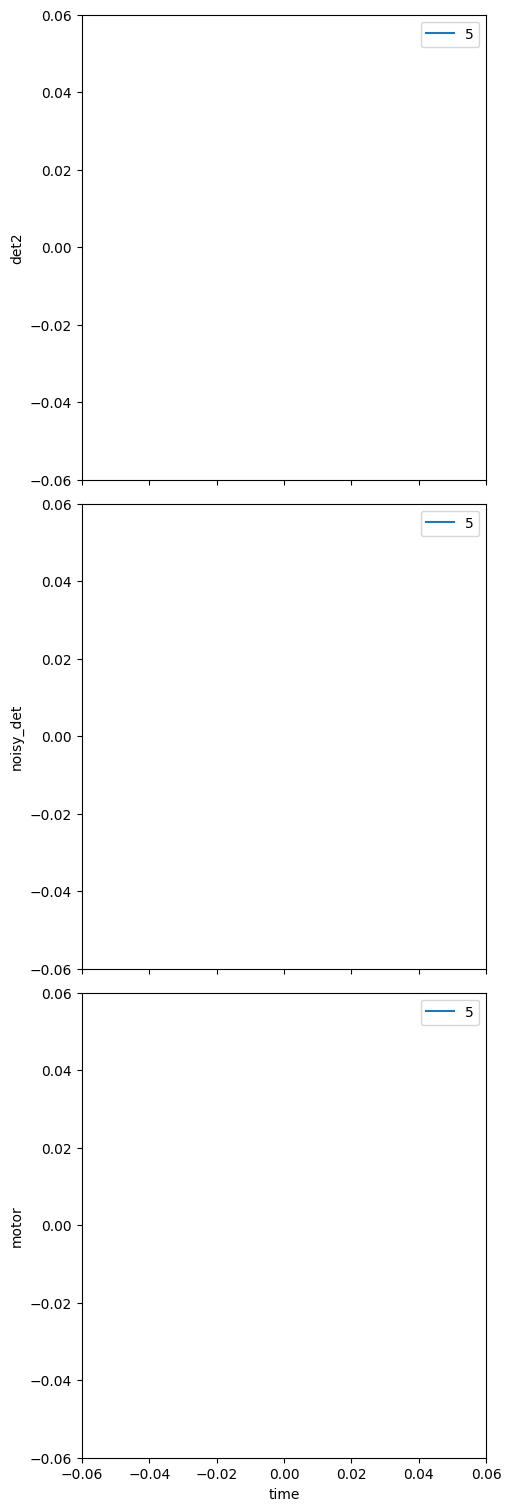

In [11]:
RE(simple_scan_saving(det2,motor,noisy_det),bec)

In [26]:
 y_position = [1]

In [27]:
y_position.extend((2,2))

In [28]:
y_position

[1, 2, 2]

In [32]:
from numpy import linspace
x_start = 0
x_end = 2
num_step = 5
y_start = -5
y_end = 5
speed = 1
steps = linspace(x_start, x_end, num_step, endpoint=True)
y_position = [y_start]
for cnt, i in enumerate(steps[1:-1]):
    if cnt % 2 == 0:
        y_position.extend((y_end, y_end))
    else:
        y_position.extend((y_start, y_start))
y_position.append(y_start)

In [33]:
y_position

[-5, 5, 5, -5, -5, 5, 5, -5]